# Pythonを使った機械学習：Classification（分類）

# 機械学習（Machine Learning）とは？
与えられたデータ群から規則性を見つけ出して，人間の学習能力をコンピュータ上で再現すること

## 教師あり学習
人間が正解データ（教師データ）を事前に与えて，それに基づいて学習を行う手法．<br>
Classification（分類）やRegresion（回帰）など

### Classification: Suport Vector Machine（SVM）
複数のデータ群を分類する境界線を作り出すことで，与えられたデータがどの分類に属するのかがわかる<br>
境界線の引き方にも色々と種類がある<br>
![](./images/svms.png) <br>
http://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html

### Classification: K-Nearest Neighbor Algorithm(KNN法）
教師データ上に与えられたデータを配置した時，教師データに近いk個のデータの割合で与えられたデータの割合を決める<br>
![](./images/knn.png)

## 教師なし学習
人間から正解データを付与されず，アルゴリズムによってコンピュータが答え（分類）を計算する手法<br>
Clustering（クラスタリング）など

## 半教師あり学習
教師ありとなしのいいとこ取りみたいな感じ

# ここでは，Classificationを扱う

# 特徴量（Features）とは？
分類のためには特徴量が必要<br>
特徴量＝コンピュータが理解できるデータ上の違い<br>
この違いが分類の決めてになる

## Irisデータ
有名なデータセットの一つで，あやめ（Iris）の花の萼片（Sepal）と花びら（Petal）の長さ（Length）と幅（Width）が三種類分（Setosa・Versicolour・Virginica）格納されている<br>
![](./images/iris.jpg)
<br>
データの種類は次元と言われる<br>
つまり，Irisデータの場合四種類のデータなので，「四次元」のデータということになる

# Scikit-Learnとは？
![Scikit-Learn ロゴマーク](http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)
Pythonで提供されている機械学習のライブラリ<br>
http://scikit-learn.org/stable/index.html
<br>
importするときは，sklearnとして扱われる<br>
anacondaに標準インストールされている<br>
<br>
anacondaを使っていない場合は
* pip install scikit-learn

<br>で導入可能

# では，実際にやってみましょう

In [1]:
import numpy as np
from sklearn import datasets

#  irisデータを読み込む
iris = datasets.load_iris()
print(iris)

{'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]), 'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-

In [2]:
# irisデータを学習データとテストデータに分割する
# データの奇数番目を学習データに，偶数番目をテストデータにする

x_train = iris.data[range(0, len(iris.data), 2)]
y_train = iris.target[range(0, len(iris.data), 2)]

x_test = iris.data[range(1, len(iris.data), 2)]
y_test = iris.target[range(1, len(iris.data), 2)]

In [3]:
from sklearn.svm import SVC

#　学習の用意
svm = SVC(probability=True, decision_function_shape="ovr")

# 分類器の設定を確認する
svm.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [4]:
# 学習器に教師データを与えて学習させる
# 引数は特徴量，教師データ（ラベル）
svm.fit(x_train, y_train)

# 分類器にテストデータを分類させる
predict = svm.predict(x_test)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2])

## 作成した分類器を評価する
### 適合率（Precion）と再現率（Recall）とは？
#### 適合率
検索結果の中で，どの程度が正解に含まれるか
#### 再現率
正解の中で，どの程度が検索にヒットするのか
![](http://cdn-ak.f.st-hatena.com/images/fotolife/Z/Zellij/20120214/20120214075315.png)
<br>http://f.hatena.ne.jp/Zellij/20120214075315<br>

# わからん！
ということで，混合行列
### 混合行列（Confusion Matrix）とは？
テストデータがどのラベルにどれだけ分類されたかを表す行列<br>
![](./images/cm1.png)<br>
![](./images/cm2.png)<br>
![](./images/cm3.png)<br>
![](./images/cm4.png)<br>

### F値（F-measure）とは？
適合率と再現率は負の相関関係にあることが多い＝トレードオフの関係にある<br>
ということで，分類器の制度を適合率と再現率の調和平均＝F値で評価する<br>
$
F-measure = \displaystyle　\frac{2\dot precion \times recall}{precion + recall}
$<br>


In [5]:
# 先ほどの分類器の混合行列を表示する
from sklearn.metrics import confusion_matrix

# 引数は，正解データと予測結果
matrix = confusion_matrix(y_test, predict)
matrix

array([[25,  0,  0],
       [ 0, 24,  1],
       [ 0,  4, 21]])

In [6]:
# F値を計算する
from sklearn.metrics import classification_report

# 引数は，正解データと予測結果
# オプションとして，target_namesを利用可能
report = classification_report(y_test, predict, target_names=iris.target_names)
print(report)

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        25
 versicolor       0.86      0.96      0.91        25
  virginica       0.95      0.84      0.89        25

avg / total       0.94      0.93      0.93        75



### K-分割交差検定（K-fold Cross-Validation）による分類器の検証
データ数があまり多くなくて，学習データとテストデータにわけると数が足りない場合などに利用される
![](./images/kfcv.png)

### グリッドサーチとは？
機械学習には，学習の際のパラメータが存在し，そのパラメータをチューニングして最良な分類器を作成する<br>
以下では，k分割交差検定法とグリッドサーチが同時に実装されている関数を用いる

In [7]:
# グリッドサーチのために，パラメータの選択肢を決定する
# polyは多項式の非線形SVMで，degreeで次数=n次関数を決定する（当然，1はlinearと変わりないので行わない）
# この他にも各パラメータについてグリッドサーチを行える
param_svm = [
{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel':['poly'], 'degree': [2, 3, 4, 5], }
 ] 

from sklearn.model_selection import GridSearchCV

# グリッドサーチ&交差検定用の学習器を設定する
# 引数に，用いる分類器，パラメータ選択肢
# オプションとして，cvはk分割交差検定の回数（つまり，k）
# オプションとして，n_jobsは並列スレッド数
from multiprocessing import cpu_count
job = cpu_count() -1
svm_cv = GridSearchCV(SVC(probability=True, decision_function_shape="ovr"), param_svm, cv=10, n_jobs=job)

# 交差検定を用いたグリッドサーチを行う
# 引数に，特徴量と正解データ
svm_cv.fit(iris.data, iris.target)

import pandas as pd
df = pd.DataFrame(svm_cv.cv_results_)
print(df)

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
0        0.003116         0.000710         0.973333          0.988148       1   
1        0.002143         0.000408         0.980000          0.980000      10   
2        0.005788         0.000630         0.973333          0.981481     100   
3        0.009609         0.000691         0.980000          0.986667    1000   
4        0.008661         0.000613         0.906667          0.921481       1   
5        0.010288         0.000629         0.906667          0.921481       1   
6        0.005414         0.000589         0.933333          0.945185      10   
7        0.007319         0.000585         0.906667          0.921481      10   
8        0.002954         0.000486         0.980000          0.979259     100   
9        0.004994         0.000546         0.933333          0.945185     100   
10       0.002586         0.000455         0.980000          0.980000    1000   
11       0.003432         0.

In [8]:
print("best estimator: %s" %svm_cv.best_estimator_)
print("best socre: %s" %svm_cv.best_score_)
print("best param: %s" %svm_cv.best_params_)
print("best score's index: %s" %svm_cv.best_index_)

best estimator: SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
best socre: 0.98
best param: {'C': 10, 'kernel': 'linear'}
best score's index: 1


### 得られた最良パラメータでもう一度学習してF値を見てみる

In [9]:
svm_best = SVC(C=10, kernel="linear", probability=True, decision_function_shape="ovr")

svm_best.fit(x_train, y_train)

predict_best = svm_best.predict(x_test)
matrix_best = confusion_matrix(y_test, predict_best)
report_best = classification_report(y_test, predict_best, target_names=iris.target_names)

print(predict_best)
print(matrix_best)
print(report_best)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 2]
[[25  0  0]
 [ 0 24  1]
 [ 0  1 24]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        25
 versicolor       0.96      0.96      0.96        25
  virginica       0.96      0.96      0.96        25

avg / total       0.97      0.97      0.97        75



#### ↑F値が0.93から0.97に上昇

### KNN法でirisデータを分類してみる

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn_param = [
    {'n_neighbors': [1, 2, 3, 4, 5],'weights': ['uniform', 'distance'], }
]

knn_cv = GridSearchCV(KNeighborsClassifier(), knn_param, cv=10, n_jobs=job)
knn_cv.fit(iris.data, iris.target)

df_knn = pd.DataFrame(knn_cv.cv_results_)
print(df_knn)

   mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.023446         0.002437         0.960000          1.000000   
1       0.000774         0.001546         0.960000          1.000000   
2       0.000810         0.001390         0.953333          0.978519   
3       0.000646         0.001168         0.960000          1.000000   
4       0.000493         0.000912         0.966667          0.960741   
5       0.000486         0.000913         0.966667          1.000000   
6       0.000474         0.000928         0.966667          0.963704   
7       0.000491         0.000936         0.966667          1.000000   
8       0.000490         0.000855         0.966667          0.968889   
9       0.000516         0.001040         0.966667          1.000000   

  param_n_neighbors param_weights                                     params  \
0                 1       uniform   {'n_neighbors': 1, 'weights': 'uniform'}   
1                 1      distance  {'n_neighbor

In [11]:
print("best estimator: %s" %knn_cv.best_estimator_)
print("best socre: %s" %knn_cv.best_score_)
print("best param: %s" %knn_cv.best_params_)
print("best score's index: %s" %knn_cv.best_index_)

best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
best socre: 0.966666666667
best param: {'n_neighbors': 3, 'weights': 'uniform'}
best score's index: 4


In [12]:
knn = KNeighborsClassifier(n_neighbors=3, weights="uniform")
knn.fit(x_train, y_train)

predict_knn = knn.predict(x_test)
matrix_knn = confusion_matrix(y_test, predict_knn)
report_knn = classification_report(y_test, predict_knn, target_names=iris.target_names)

print(predict_knn)
print(matrix_knn)
print(report_knn)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]
[[25  0  0]
 [ 0 23  2]
 [ 0  1 24]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        25
 versicolor       0.96      0.92      0.94        25
  virginica       0.92      0.96      0.94        25

avg / total       0.96      0.96      0.96        75



### SVMでdigitsデータを分類してみる
（おそらく）数字の手書き画像データ

In [13]:
digits = datasets.load_digits()
print(digits)

{'target': array([0, 1, 2, ..., 8, 9, 8]), 'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blo

#### とりあえず表示してみる

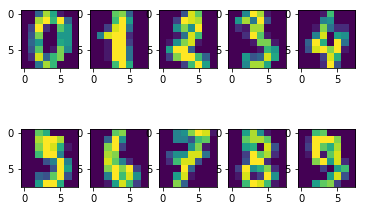

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(10) :
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.images[i])

#### 最良パラメータをチューニングして，その評価を行う

In [15]:
digits_cv = GridSearchCV(SVC(probability=True, decision_function_shape="ovr"), param_svm, cv=10, n_jobs=job)
digits_cv.fit(digits.data, digits.target)

df_digits = pd.DataFrame(digits_cv.cv_results_)
print(df_digits)

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
0        0.443201         0.012105         0.961046          1.000000       1   
1        0.446827         0.010360         0.961046          1.000000      10   
2        0.447012         0.009788         0.961046          1.000000     100   
3        0.409671         0.011310         0.961046          1.000000    1000   
4        1.058371         0.020059         0.978854          0.998887       1   
5        0.913919         0.025540         0.954925          0.981883       1   
6        1.059373         0.022501         0.981080          1.000000      10   
7        0.511332         0.015265         0.969393          0.997836      10   
8        1.033091         0.024513         0.981080          1.000000     100   
9        0.467656         0.013597         0.971619          1.000000     100   
10       1.139972         0.025953         0.981080          1.000000    1000   
11       0.536867         0.

In [16]:
print("best estimator: %s" %digits_cv.best_estimator_)
print("best socre: %s" %digits_cv.best_score_)
print("best param: %s" %digits_cv.best_params_)
print("best score's index: %s" %digits_cv.best_index_)

best estimator: SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
best socre: 0.981079577073
best param: {'C': 10, 'kernel': 'rbf', 'gamma': 0.001}
best score's index: 6


#### 最良パラメータに基づいて分類器を作成してF値で評価する

In [17]:
svm_digits = SVC(C=10, kernel="rbf", gamma=0.001, probability=True, decision_function_shape="ovr")


xd_train = digits.data[range(0, len(digits.data), 2)]
yd_train = digits.target[range(0, len(digits.data), 2)]

xd_test = digits.data[range(1, len(digits.data), 2)]
yd_test = digits.target[range(1, len(digits.data), 2)]

svm_digits.fit(xd_train, yd_train)

predict_digits = svm_digits.predict(xd_test)
matrix_digits = confusion_matrix(yd_test, predict_digits)
report_digits = classification_report(yd_test, predict_digits)

print("predict results")
print(predict_digits)
print("confusion matrix")
print(matrix_digits)
print("F-measure")
print(report_digits)

predict results
[1 3 9 7 9 1 3 5 7 9 1 3 5 7 9 9 5 5 5 9 4 7 3 1 0 2 8 0 2 3 7 3 6 6 7 5 9
 2 2 0 7 3 1 4 3 3 1 6 4 1 0 3 9 1 5 4 2 2 5 9 4 8 9 8 1 1 3 5 7 9 1 3 5 7
 9 1 3 5 7 9 9 5 5 9 9 4 7 3 1 0 2 8 0 2 3 7 3 6 6 9 5 9 2 2 0 7 3 1 3 3 1
 6 4 1 0 3 9 1 5 4 2 2 5 4 8 9 8 8 1 3 5 7 9 1 3 5 7 9 1 3 5 7 9 9 5 5 9 9
 4 7 3 1 0 2 8 0 2 3 7 3 6 6 9 5 9 2 2 0 7 3 1 4 3 3 1 6 4 1 0 3 9 1 5 4 2
 2 5 9 4 8 9 8 3 1 3 5 7 9 1 3 5 7 9 1 3 5 7 9 9 5 9 9 9 4 7 3 1 0 2 8 0 2
 3 7 3 6 6 9 5 9 2 2 0 7 3 1 4 3 3 1 6 4 1 0 3 9 1 5 4 2 2 5 9 4 8 9 8 8 1
 3 5 7 9 1 3 5 7 9 1 3 5 7 9 8 5 5 9 9 4 7 3 1 0 2 8 0 2 3 7 3 6 6 9 5 9 2
 2 0 7 3 1 4 3 3 1 6 4 1 0 3 9 1 5 4 2 2 5 9 4 8 9 8 8 1 3 5 7 9 1 3 5 7 9
 1 3 5 7 9 9 5 5 9 9 4 7 3 1 0 2 8 0 2 3 7 3 6 6 9 5 9 2 2 0 7 3 1 4 3 3 1
 6 4 1 0 3 9 1 5 4 2 2 5 9 4 8 9 8 8 1 3 5 7 9 1 3 5 7 9 1 3 5 7 9 9 5 5 9
 9 4 7 3 1 0 2 8 0 2 3 7 3 6 6 9 5 9 2 2 0 7 3 1 4 3 3 1 6 4 1 0 3 9 1 5 4
 2 2 5 9 4 8 9 8 8 2 4 6 8 0 2 4 6 8 0 2 4 6 8 0 5 6 0 8 8 1 7 5 2 8 0 2 3
 7 3 6 6 

## 次元削減

特徴量が多いということは，計算コストの増大やトラッシュデータを含んでいるということに繋がる<br>
トラッシュデータは，推定率の低下に繋がる→削ろう！

### RandomForest
決定木学習の一種で，ランダムフォレストは決定木を複数組み合わせて、各決定木の予測結果を多数決することによって結果を得る方法．<br>
ランダムフォレストのメリットとして，相対的な特徴量の重要度を取得することができる．

### PCA：主成分分析
特徴量をまとめて，新しい特徴量を作り出す方式

In [18]:
# ランダムフォレストで次元削減を行なう

from sklearn.ensemble import RandomForestClassifier as rf

# irisデータをランダムフォレストに学習させる
forest = rf(n_estimators=10000, n_jobs=job)
forest.fit(iris.data, iris.target)

# 重要度を取得
importance = pd.DataFrame(forest.feature_importances_, index=iris.feature_names, columns=["importance"])
print(importance)

                   importance
sepal length (cm)    0.098198
sepal width (cm)     0.023140
petal length (cm)    0.436171
petal width (cm)     0.442490


In [23]:
# sepal widthの重要度が低いので除外してSVMで分類してみる

# sepal widthを除いた特徴量のnparrayを作成する
rf_data = np.append(iris.data[:, :1], iris.data[:, 2:], axis=1)
rf_train = np.append(x_train[:, :1], x_train[:, 2:], axis=1)
rf_test = np.append(x_test[:, :1], x_test[:, 2:], axis=1)

# 先ほどと同じ条件でグリッドサーチを行なう
svm_rf = GridSearchCV(SVC(probability=True, decision_function_shape="ovr"), param_svm, cv=10, n_jobs=job)
svm_rf.fit(rf_data, iris.target)

df_rf = pd.DataFrame(svm_rf.cv_results_)
print(df_rf)

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
0        0.002947         0.000783         0.980000          0.982963       1   
1        0.002088         0.000445         0.973333          0.982963      10   
2        0.004307         0.000555         0.973333          0.980741     100   
3        0.010002         0.000623         0.966667          0.983704    1000   
4        0.008575         0.000634         0.900000          0.902963       1   
5        0.008366         0.000627         0.900000          0.902963       1   
6        0.006418         0.000905         0.940000          0.942222      10   
7        0.008506         0.000629         0.900000          0.902963      10   
8        0.003138         0.000544         0.973333          0.972593     100   
9        0.005177         0.000611         0.940000          0.942222     100   
10       0.001644         0.000332         0.973333          0.974074    1000   
11       0.003266         0.

In [24]:
print("best estimator: %s" %svm_rf.best_estimator_)
print("best socre: %s" %svm_rf.best_score_)
print("best param: %s" %svm_rf.best_params_)
print("best score's index: %s" %svm_rf.best_index_)

best estimator: SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
best socre: 0.98
best param: {'C': 1, 'kernel': 'linear'}
best score's index: 0


In [25]:
svm_bestrf = SVC(C=1, kernel="linear", probability=True, decision_function_shape="ovr")

svm_bestrf.fit(rf_train, y_train)

predict_bestrf = svm_bestrf.predict(rf_test)
matrix_bestrf = confusion_matrix(y_test, predict_bestrf)
report_bestrf = classification_report(y_test, predict_bestrf, target_names=iris.target_names)

print(predict_bestrf)
print(matrix_bestrf)
print(report_bestrf)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]
[[25  0  0]
 [ 0 24  1]
 [ 0  0 25]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        25
 versicolor       1.00      0.96      0.98        25
  virginica       0.96      1.00      0.98        25

avg / total       0.99      0.99      0.99        75



#### ↑F値が0.97から0.99に上昇